## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости (1й столбец - номер города, 2й и 3й - координаты). Используйте L1 расстояние для расчетов и визуализации.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

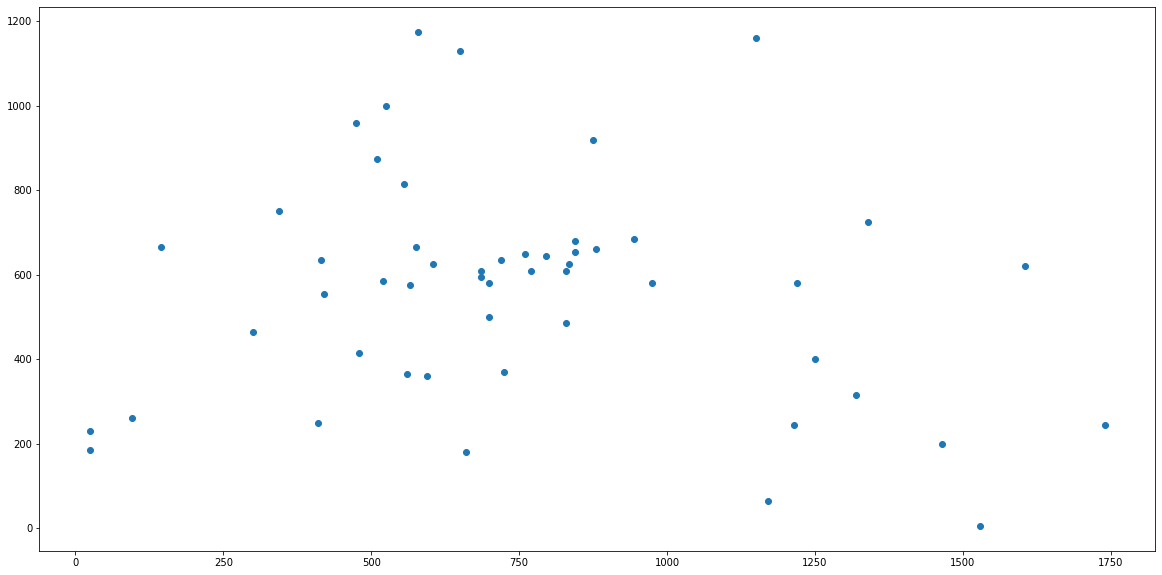

In [17]:
df = pd.read_csv('hw9_data/tsp.csv', names=['name', 'x', 'y'])
plt.figure(figsize=(20, 10))
plt.scatter(df.x, df.y)
plt.show()

In [25]:
# рассчет матрицы расстояний
def dist_matrix(vec, metric='cityblock'):
    return cdist(vec, vec, metric=metric)

In [66]:
# рассчет длины маршрута
def calculate_path_len(dists, path):
    total = 0
    
    n = len(path)
    for i in range(n):
        if i == n - 1:
            break
        total += dists[path[i]][path[i + 1]]
    
    return total

In [67]:
dists = dist_matrix(df[['x', 'y']].values)

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

In [137]:
def monte_carlo(dists, iterations=100000):
    n = dists.shape[0]
    idx = np.arange(n)
    
    best = None
    best_path = None
    
    for _ in range(iterations):
        np.random.shuffle(idx)
        
        new_len = calculate_path_len(dists, idx)
        
        if best == None or new_len < best:
            best = new_len
            best_path = np.copy(idx)
    
    return best, best_path

In [138]:
monte_carlo(dists)

(27620.0,
 array([32, 25, 13, 12, 45, 24,  8, 18, 16, 19, 33, 30,  9, 29, 48,  7, 17,
        37, 39,  4,  1,  6, 41, 47, 50, 10, 26, 35, 27, 46, 51, 14, 21,  2,
        40, 20, 28,  5, 49,  0,  3, 31, 11, 42, 22, 38, 36, 15, 43, 44, 34,
        23]))

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

Для случайного блуждания будем "переворачивать" случайную часть маршрута на обратную

In [161]:
def random_walk(dists, iterations=100000):
    n = dists.shape[0]
    idx = np.arange(n)
        
    # случайный маршрут
    np.random.shuffle(idx)
    start_len = calculate_path_len(dists, idx)
    
    best = start_len
    best_path = np.copy(idx)
    
    for _ in range(iterations):
        flip_idx = np.sort(np.random.choice(n, 2, replace=False))
    
        idx[flip_idx[0]: flip_idx[1] + 1] = np.flip(idx[flip_idx[0]: flip_idx[1] + 1])
        new_len = calculate_path_len(dists, idx)
        
        if new_len < best:
            best = new_len
            best_path = np.copy(idx)
    
    best = calculate_path_len(dists, best_path)
    
    return best, best_path

In [162]:
random_walk(dists)

(27290.0,
 array([16, 28,  8, 44, 49, 30,  7, 39, 31, 38,  0, 42, 18, 24, 17, 21, 29,
        35, 20,  2, 36, 14, 37,  6, 19, 45, 23, 40, 12, 51, 10, 50, 46, 25,
        33, 34,  5,  9, 32, 47, 48, 11, 13, 26,  4, 22, 15, 27,  3, 43, 41,
         1]))

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

In [163]:
def hill_climb(dists, iterations=100000):
    n = dists.shape[0]
    idx = np.arange(n)
        
    # случайный маршрут
    np.random.shuffle(idx)
    start_len = calculate_path_len(dists, idx)
    
    for _ in range(iterations):
        flip_idx = np.sort(np.random.choice(n, 2, replace=False))
        
        old_p1 = 0
        new_p1 = 0
        if flip_idx[0] > 0:
            old_p1 = dists[idx[flip_idx[0] - 1]][idx[flip_idx[0]]]
            new_p1 = dists[idx[flip_idx[0] - 1]][idx[flip_idx[1]]]
        
        old_p2 = 0
        new_p2 = 0
        if flip_idx[1] < n - 1:
            old_p2 = dists[idx[flip_idx[1]]][idx[flip_idx[1] + 1]]
            new_p2 = dists[idx[flip_idx[0]]][idx[flip_idx[1] + 1]]
                
        new_len = start_len - old_p1 - old_p2 + new_p1 + new_p2
        
        if new_len < start_len:
            start_len = new_len
            idx[flip_idx[0]: flip_idx[1] + 1] = np.flip(idx[flip_idx[0]: flip_idx[1] + 1])
    
    start_len = calculate_path_len(dists, idx)
    
    return start_len, idx

In [164]:
hill_climb(dists)

(9405.0,
 array([50, 10, 51, 12, 13, 46, 25, 26, 27, 11, 24, 45, 47, 23,  4,  5,  3,
        42, 14, 37, 39, 36, 38, 35, 34, 33, 43, 15, 28, 29,  6,  1, 41, 20,
        16,  2, 17, 30, 21,  0, 22, 19, 49, 48, 31, 44, 18, 40,  7,  8,  9,
        32]))

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

In [4]:
#YOUR_CODE

### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.

In [5]:
#YOUR_CODE